<a href="https://colab.research.google.com/github/bbygsha/Shawna-Daniels-JSURE-2021/blob/Python-Codes-and-Data/BertalanffyMethodsForStudentDataShawnaDaniels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bertalanffy Model for Student Data**
The student learn and run about the code for the Bertalanffy model. The model is ODE (Ordinary Differential Equation) as follow:
$$ \frac{dN}{dt} = \alpha N^\gamma - \beta N$$
To get the best fit model to the data we optimize the sum of square errors (SSE) between the data and the model, which is the solution of the ODE. We use Powel method to solve the optimization problem.  

We use other best fit measuremants, i.e. AIC and BIC, from this website: https://pypi.org/project/RegscorePy/

To install the package, you need to do as follows: \\
pip install RegscorePy

The usages of AIC and BIC are as follows:  \\
aic(y, y_pred, p)  \\
bic(y, y_pred, p)   \\
where y is the data, y_pred is the model/predicted ouput, and p is the number of parameters (integer).

Before running the code the student need to place the data in their local directory in their own computer. Make sure the name of the data is the same as in the line of the code that call the data. When running the code, the student need to locate the data and click it to open in the code and finish the process finding the solution. 
The student may use the data saved in the Google Drive by hastagging the command lines for uploading the file from the local directory and unhashtagging the command lines for uploading from Google Drive. 

The command lines for upload file from the local computer drive are as follow:

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
print('User uploaded file "{name}" with length {length} bytes'.format( name=fn, length=len(uploaded[fn])))

We can use or upload  the data in the Google Drive with the command lines as follows:

from google.colab import drive
drive.mount('/content/drive')

In [1]:
pip install RegscorePy  # You may not need to run this command line after you did once. 

Mounted at /content/drive
[0. 1. 2. 3. 4. 5.]
[ 300000.  177500.  360000. 2172500. 1760000. 1360000.]
Initial SSE Objective: 8.500902429e+11
alpha01: 1635.694146
alpha02: 386249.61083
alpha03: -68603.793
gamma0 : 0.11496199516
beta0  : 0.2


/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Optimization terminated successfully.
         Current function value: 19269178960.812908
         Iterations: 5
         Function evaluations: 704
Final SSE Objective: 1.926917896e+10
apha1 : 13972.412219460317
apha2 : 487224.86570970085
apha3 : -17540.09307242388
gamma : 0.10550331159235284
beta  : 0.18553276686256007
 AIC : 141.3400794527063
 BIC : 140.29887679884658
 SSE : 1.926917896e+10


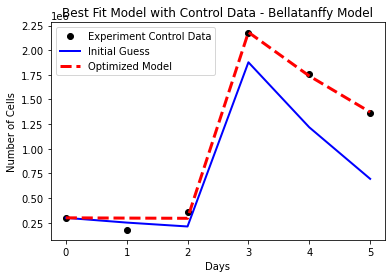

In [ ]:
import numpy as np
# from math import log
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize
from RegscorePy import *
from scipy.interpolate import interp1d
# upload file from local drive 
# from google.colab import files
# uploaded = files.upload()
# for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))
# upload from Google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# with open('/content/drive/HonourControlData.txt', 'r') as f:
#  f.write('Hello Google Drive!')
# !cat /content/drive/My\ Drive/HonourControlData.txt

# Import CSV data file
# Column 1 = time (t)
# Column 2 = input (u)
# Column 3 = output (yp)
# data = np.loadtxt('datameagancontroljustindata.txt',delimiter=',')
# data = np.loadtxt('dataskyler.txt',delimiter=',')
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/HonourControlData.txt')
#data = np.loadtxt('AuNPsTreatmentHounorA.txt', skiprows=1, max_rows=5, dtype={'names': ('Concentration', 
#                     'Day 0', 'Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'),
#                     'formats': ('S1', 'f4' , 'f4', 'f4', 'f4', 'f4', 'f4')})
# data = np.loadtxt('LM2-4LUC.txt',skiprows=1)
# u0 = data[0,1]
# yp0 = data[0,1]
# t = data[:,0].T - data[0,0]
# ID = data[:,0]
# print(ID)
# data = data.T
# print("print data :\n", data)
t = data[:,0]
print(t)
# u = data[:,1].T
# yp = np.log(data[:,1])
yp = data[:,1]
# log(data[:,1])
print(yp)

# specify number of steps
ns = len(t)
# delta_t = t[1]-t[0]
# create linear interpolation of the u data versus time
# yp = interp1d(t,yp)

# define first-order for the Betalantfyy model    
# def fopdt(y,t,x,alpha1,alpha2,beta)
def fopdt(y,t,x,alpha1,alpha2,alpha3,gamma,beta):
    # arguments
    #  y      = output
    #  t      = time
    #  x      = input linear function (for time shift)
    #  alpha1 and alpha2  = coeficient for model gain
    #  beta   = model loss or dead/kill
    #  
    alpha1 = x[0]
    alpha2 = x[1]
    alpha3 = x[2]
    gamma  = x[3]
    beta = x[4]
#    try:
    if t <= 2.0:
             dydt = alpha1*y**gamma-beta*y
    else: 
        if t <= 3.0:
#            alpha2 = x[1]
             dydt = alpha2*y**gamma-beta*y 
        else:
#                Km3 = x[2]
             dydt = alpha3*y**gamma-beta*y
  #  except:
    #    print('Error with time extrapolation: ' + str(t))
    #    um = 0
    # calculate derivative
    #    dydt = Km*y                # (-(y-yp0))*Km # + Km * (um-u0))/taum
    return dydt

# simulate FOPDT model with x=[Km,taum,thetam]
def sim_model(x):
    # input arguments
    alpha1 = x[0]
    alpha2 = x[1]
    alpha3 = x[2]
    gamma = x[3]  
    beta = x[4]
    # thetam = x[2]
    # storage for model values
    ym = np.zeros(ns)  # model
    # initial condition
#    ym[0] = 930000
    ym[0] = yp[0]

    # loop through time steps    
    for i in range(0,ns-1):
        ts = [t[i],t[i+1]]
  #              y1 = odeint(fopdt,ym[i],ts,args=(uf,Km,taum,thetam))
  #      y1 = odeint(fopdt,ym[i],ts,args=(x,alpha1,alpha1,beta))
        y1 = odeint(fopdt,ym[i],ts,args=(x,alpha1,alpha2,alpha3,gamma,beta))
        ym[i+1] = y1[-1]
    return ym

# define objective
def objective(x):
    # simulate model
    ym = sim_model(x)
    # calculate objective
    obj = 0.0
    for i in range(len(ym)):
        obj = obj + (ym[i]-yp[i])**2    
    # return result
    return obj

# initial guesses
x0 = np.zeros(5) #                    Powell      
x0[0] = 1635.694146   # alpha2 = 1635.694146,30.0, 971400             # 970.0 # alpha1 = 30.0
x0[1] = 386249.61083  # alpha2 = 386249.61083, 56600, 5860000            # 56600.0               
x0[2] = -68603.793    # alpha3 = -68603.793, -130, 4080000            # -420.31 # gamma = -130.0           30.0               
x0[3] = 0.11496199516 # gamma  = 0.11496199516, 0.19, 0.09               # 0.19 # alpha3 = NA             NA                 
x0[4] = 0.2          # beta = 0.3, 1.11, 10.0                 # 1.11 # beta

# AIC : 141.59596212200137, 141.13283570766623, 151.01417667954655
# BIC : 140.55475946814164, 140.0916330538065, 149.97297402568682
# SSE : 2.010872873e+10, 1.861497288e+10, 9.662682674e+10                
#       SSE    3.112692145853754e-07  1.0600646072056463e-07 
# show initial objective
print('Initial SSE Objective: ' + "{:.9e}".format((objective(x0))))
# print('alpha01: ' + str(x0[0]),', alpha01: ' + str(x0[1]))
print('alpha01: ' + str(x0[0]))
print('alpha02: ' + str(x0[1]))
print('alpha03: ' + str(x0[2]))
print('gamma0 : ' + str(x0[3]))
print('beta0  : ' + str(x0[4]))
# optimize Km, taum, thetam
# ym1 = sim_model(x0)
# ym2 = sim_model(x)
# plt.plot(t,yp,'ok',linewidth=2,label='Experiment Control Data')
# plt.plot(t,ym1,'b-',linewidth=2,label='Initial Guess')
# plt.plot(t,ym2,'r--',linewidth=3,label='Optimized Model')

# plt.xlabel('Days')
# plt.ylabel('Number of Cells')
# plt.title('Best Fit Model with Control Data - Bellatanffy')
# plt.legend(loc='best')
# plt.plot(t,ym1,'b-',linewidth=2,label='Initial Guess')
# plt.show()

# solution = minimize(objective,x0,options={'xtol': 1e-8, 'maxfev':10000,'disp': True})
#solution = minimize(objective,x0,method='nelder-mead',
#               options={'xatol': 1e-8, 'maxfev':500000,'disp': True})
solution = minimize(objective,x0,method='powell',
              options={'xtol': 1e-8, 'maxfev':10000,'disp': True})

# Another way to solve: with bounds on variables
#bnds = ((0.4, 0.6), (1.0, 10.0), (0.0, 30.0))
#solution = minimize(objective,x0,bounds=bnds,method='SLSQP')
x = solution.x

# show final objective
print('Final SSE Objective: ' + "{:.9e}".format((objective(x))))
print('apha1 : ' + str(x[0]))
print('apha2 : ' + str(x[1]))
print('apha3 : ' + str(x[2]))
print('gamma : ' + str(x[3]))
print('beta  : ' + str(x[4]))

# print('taup: ' + str(x[1]))
# print('thetap: ' + str(x[2]))

# calculate model with updated parameters
ym1 = sim_model(x0)
ym2 = sim_model(x)

p = 5  # number of parameters
print(" AIC : " + str(aic.aic(yp, ym2, p)))
print(" BIC : " + str(bic.bic(yp, ym2, p)))
print(' SSE : ' + "{:.9e}".format((objective(x))))
# print("AIC =",aicnum)
# plot results
# plt.figure(1)
# plt.subplot(2,1,1)
#plt.plot(t,np.log(yp),'ok',linewidth=2,label='Experiment Control Data')
#plt.plot(t,np.log(ym1),'b-',linewidth=2,label='Initial Guess')
#plt.plot(t,np.log(ym2),'r--',linewidth=3,label='Optimized Model')
plt.plot(t,yp,'ok',linewidth=2,label='Experiment Control Data')
plt.plot(t,ym1,'b-',linewidth=2,label='Initial Guess')
plt.plot(t,ym2,'r--',linewidth=3,label='Optimized Model')

plt.xlabel('Days')
plt.ylabel('Number of Cells')
plt.title('Best Fit Model with Control Data - Bellatanffy Model')
plt.legend(loc='best')
#plt.subplot(2,1,2)
#plt.plot(t,x[0],'bx-',linewidth=2)
#plt.plot(t,x[1],'r--',linewidth=3)
# plt.legend(['Measured','Interpolated'],loc='best')
# plt.ylabel('Input Data')
data = np.vstack((t,yp,ym2,)) # vertical stack
data = data.T              # transpose data
np.savetxt('outputdatamd6control.txt',data,delimiter=',')
plt.savefig('outputmodel62Kmbeta.png',dpi=300, bbox_inches='tight')
plt.show()